This notebook contains implementation code needed to reproduce the data generation process of the framework described in the paper:

## Towards Building a Digital Twin of Complex System using Causal Modelling

by Luka Jakovljevic<sup>1,2</sup>, Dimitre Kostadinov<sup>1</sup>, Armen Aghasaryan<sup>1</sup> and Themis Palpanas<sup>2</sup>

<sup>1</sup>*Nokia Bell Labs, France*\
<sup>2</sup>*University of Paris, France*

>that is presented on **The 10th International Conference on Complex Networks and their Applications**\
*in Madrid, Spain (November 30 - December 2, 2021)* ["complexnetworks.org"](https://complexnetworks.org/)

>and will soon appear in **Volume 1015 of Springer - Studies in Computational Intelligence Series**

code published under:<br>
BSD 3-Clause License<br>
(for more info read ["LICENSE file"](https://github.com/nokia/causal-digital-twin/blob/main/LICENSE))

Copyright (c) 2021, Nokia<br>
All rights reserved.

### <br><br><br>Framework for creation  of  a  Digital  twin:

Modelling  behaviour  of  observable  system states, that enables mimicking:
* the appearance;
* propagation;
* and persistence of **faults** in time:

<img src = 'causal_digital_twin.JPG' />

#### _This notebook showcases how the **Causal Model** (input for a Digital Twin) is built given known Causal Structure and noisy-OR parameters, as defined in the paper._

> **Content of this notebook:**
1. Loading `causal_digital_twin` python module;<br>
2. Synthesizing 3 datasets from a DAG of size 5;<br>
3. Synthesizing 3 datasets from a DAG of size 10;<br>
4. Synthesizing 3 datasets from a DAG of size 15;<br>
5. Synthesizing 3 datasets from a DAG of size 20;<br>
6. Synthesizing 3 datasets from a DAG of size 50;<br>

# <br><br><br>1. Loading `causal_digital_twin` python module:

In [1]:
# import all functions from module
from causal_digital_twin import *

# <br><br><br>2. Synthesizing 3 datasets from a DAG of size 5:

For more datasets, just change number of `simulations`

	Starting simulation number 1 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
	Simulation successful
	Dataset number 1 is created
 


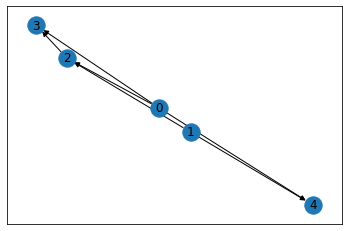

	Starting simulation number 2 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
	Simulation successful
	Dataset number 2 is created
 


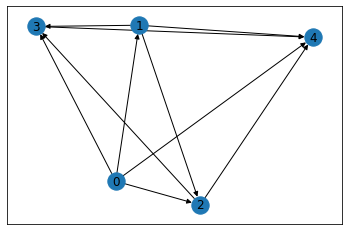

	Starting simulation number 3 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
	Simulation successful
	Dataset number 3 is created
 


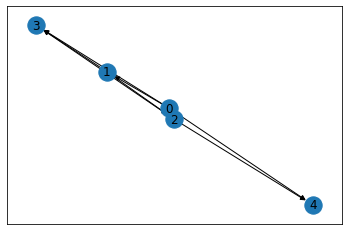

In [2]:
graph_size = 5
d = 3 # target edge degree
prob = d / (graph_size - 1) # probability to assign edge
length = 1000
simulations = 3 # desired number of simulations-datasets
successful = np.array([]) # number of successful simulations-datasets

while len(successful) < simulations:
    print("\tStarting simulation number " + str(len(successful)+1) +" :")
    
    # generate DAG
    DAG = generate_DAG(graph_size, prob)
    """
    function above generates a random (ER) DAG of size n and edge probability p 
    """
    
    # parametrize DAG with desired probabilities (defining range of probabilities)
    parametrize_DAG (DAG, lam = [0.005, 0.05], v_self = [0, 0.05], v_prop = [0.95, 1], lag = 3, step = 0.0001)
    """
    function above parametrizes DAG with SCM probabilities
    lam: probability that fault appears
    v_self: probability that fault persists on a node
    v_prop: probability that fault propagates to child node
    lag: time (samples) needed for a fault to propagate from parent to child
    step: probability resolution
    """
    
    # get undirected version in order so we can perform function nx.is_connected() below
    undirected = DAG.to_undirected(reciprocal=False, as_view=False)
    # check if we obtained a DAG                               
    if is_directed_acyclic_graph(DAG)==True and nx.is_connected(undirected)==True and len(DAG)==graph_size:
        
        # create dataset and extract ground truth list
        dataset = time_series(DAG, 1000)
        
        """
        function above builds Causal Model (SCM) and synthesizes time series of desired length
        by taking a graph (DAG) as input (structure + parameters) as depicted on Figure 2 in paper
        """
        
        
        dataset = dataset.astype('int32')
        durations = dataset.sum(axis=0)
        # if alert is almost always active (>98%) we run the simulation again
        durations_thresholded = [1 if i>=0.98*length else 0 for i in durations] 
        if sum(durations_thresholded) < 1:
            print("\tSimulation successful")        
            print("\tDataset number " + str(len(successful)+1) +" is created")
            print(" ")
            successful = np.append(successful, len(successful))
            # list of ground truth edges:
            # gt = get_ground_truth(DAG)
            # visualize DAG:
            plot_DAG(DAG)
            # save dataset
            dataset.to_csv('datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +'.csv', header=True, index = False)
            # save DAG parameters - ground truth
            nx.write_gexf(DAG, 'datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +"-groundtruth.gexf")
            
        else:
            print("\tError: There is at least one alert which is always active")                           
    else:
        # since graph generation process is random, sometimes the graph is not a DAG
        print("\tError: No DAG")

# <br><br><br>3. Synthesizing 3 datasets from a DAG of size 10:

For more datasets, just change number of `simulations`

	Starting simulation number 1 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
	Simulation successful
	Dataset number 1 is created
 


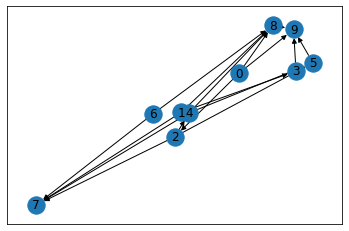

	Starting simulation number 2 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
	Simulation successful
	Dataset number 2 is created
 


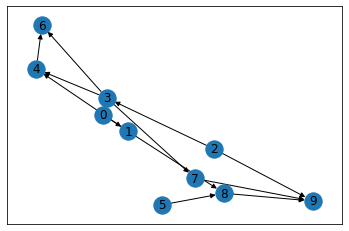

	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
	Simulation successful
	Dataset number 3 is created
 


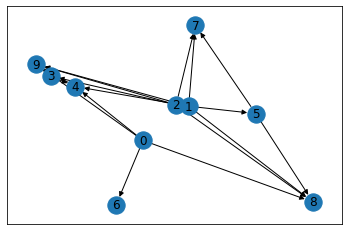

In [3]:
graph_size = 10
d = 3 # target edge degree
prob = d / (graph_size - 1) # probability to assign edge
length = 1000
simulations = 3 # desired number of simulations-datasets
successful = np.array([]) # number of successful simulations-datasets

while len(successful) < simulations:
    print("\tStarting simulation number " + str(len(successful)+1) +" :")
    
    # generate DAG
    DAG = generate_DAG(graph_size, prob)
    """
    function above generates a random (ER) DAG of size n and edge probability p 
    """
    
    # parametrize DAG with desired probabilities (defining range of probabilities)
    parametrize_DAG (DAG, lam = [0.005, 0.05], v_self = [0, 0.05], v_prop = [0.95, 1], lag = 3, step = 0.0001)
    """
    function above parametrizes DAG with SCM probabilities
    lam: probability that fault appears
    v_self: probability that fault persists on a node
    v_prop: probability that fault propagates to child node
    lag: time (samples) needed for a fault to propagate from parent to child
    step: probability resolution
    """
    
    # get undirected version in order so we can perform function nx.is_connected() below
    undirected = DAG.to_undirected(reciprocal=False, as_view=False)
    # check if we obtained a DAG                               
    if is_directed_acyclic_graph(DAG)==True and nx.is_connected(undirected)==True and len(DAG)==graph_size:
        
        # create dataset and extract ground truth list
        dataset = time_series(DAG, 1000)
        
        """
        function above builds Causal Model (SCM) and synthesizes time series of desired length
        by taking a graph (DAG) as input (structure + parameters) as depicted on Figure 2 in paper
        """
        
        
        dataset = dataset.astype('int32')
        durations = dataset.sum(axis=0)
        # if alert is almost always active (>98%) we run the simulation again
        durations_thresholded = [1 if i>=0.98*length else 0 for i in durations] 
        if sum(durations_thresholded) < 1:
            print("\tSimulation successful")        
            print("\tDataset number " + str(len(successful)+1) +" is created")
            print(" ")
            successful = np.append(successful, len(successful))
            # list of ground truth edges:
            # gt = get_ground_truth(DAG)
            # visualize DAG:
            plot_DAG(DAG)
            # save dataset
            dataset.to_csv('datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +'.csv', header=True, index = False)
            # save DAG parameters - ground truth
            nx.write_gexf(DAG, 'datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +"-groundtruth.gexf")
            
        else:
            print("\tError: There is at least one alert which is always active")                           
    else:
        # since graph generation process is random, sometimes the graph is not a DAG
        print("\tError: No DAG")

# <br><br><br>4. Synthesizing 3 datasets from a DAG of size 15:

For more datasets, just change number of `simulations`

	Starting simulation number 1 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
	Simulation successful
	Dataset number 1 is created
 


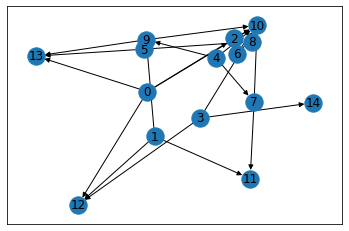

	Starting simulation number 2 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
	Simulation successful
	Dataset number 2 is created
 


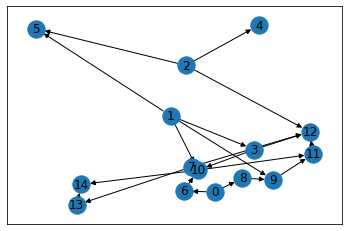

	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
	Simulation successful
	Dataset number 3 is created
 


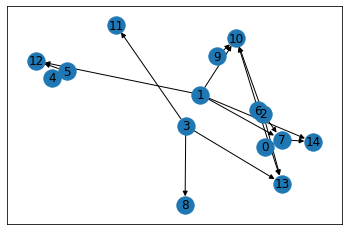

In [4]:
graph_size = 15
d = 3 # target edge degree
prob = d / (graph_size - 1) # probability to assign edge
length = 1000
simulations = 3 # desired number of simulations-datasets
successful = np.array([]) # number of successful simulations-datasets

while len(successful) < simulations:
    print("\tStarting simulation number " + str(len(successful)+1) +" :")
    
    # generate DAG
    DAG = generate_DAG(graph_size, prob)
    """
    function above generates a random (ER) DAG of size n and edge probability p 
    """
    
    # parametrize DAG with desired probabilities (defining range of probabilities)
    parametrize_DAG (DAG, lam = [0.005, 0.05], v_self = [0, 0.05], v_prop = [0.95, 1], lag = 3, step = 0.0001)
    """
    function above parametrizes DAG with SCM probabilities
    lam: probability that fault appears
    v_self: probability that fault persists on a node
    v_prop: probability that fault propagates to child node
    lag: time (samples) needed for a fault to propagate from parent to child
    step: probability resolution
    """
    
    # get undirected version in order so we can perform function nx.is_connected() below
    undirected = DAG.to_undirected(reciprocal=False, as_view=False)
    # check if we obtained a DAG                               
    if is_directed_acyclic_graph(DAG)==True and nx.is_connected(undirected)==True and len(DAG)==graph_size:
        
        # create dataset and extract ground truth list
        dataset = time_series(DAG, 1000)
        
        """
        function above builds Causal Model (SCM) and synthesizes time series of desired length
        by taking a graph (DAG) as input (structure + parameters) as depicted on Figure 2 in paper
        """
        
        
        dataset = dataset.astype('int32')
        durations = dataset.sum(axis=0)
        # if alert is almost always active (>98%) we run the simulation again
        durations_thresholded = [1 if i>=0.98*length else 0 for i in durations] 
        if sum(durations_thresholded) < 1:
            print("\tSimulation successful")        
            print("\tDataset number " + str(len(successful)+1) +" is created")
            print(" ")
            successful = np.append(successful, len(successful))
            # list of ground truth edges:
            # gt = get_ground_truth(DAG)
            # visualize DAG:
            plot_DAG(DAG)
            # save dataset
            dataset.to_csv('datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +'.csv', header=True, index = False)
            # save DAG parameters - ground truth
            nx.write_gexf(DAG, 'datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +"-groundtruth.gexf")
            
        else:
            print("\tError: There is at least one alert which is always active")                           
    else:
        # since graph generation process is random, sometimes the graph is not a DAG
        print("\tError: No DAG")

# <br><br><br>5. Synthesizing 3 datasets from a DAG of size 20:

For more datasets, just change number of `simulations`

	Starting simulation number 1 :
	Error: No DAG
	Starting simulation number 1 :
	Error: No DAG
	Starting simulation number 1 :
	Error: No DAG
	Starting simulation number 1 :
	Error: No DAG
	Starting simulation number 1 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
Simulation for node number 15 is successful
Simulation for node number 16 is successful
Simulation for node number 17 is successfu

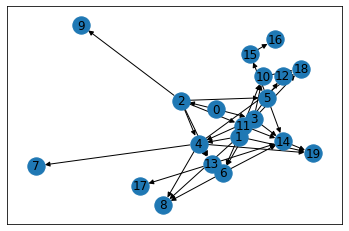

	Starting simulation number 2 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
Simulation for node number 15 is successful
Simulation for node number 16 is successful
Simulation for node number 17 is successful
Simulation for node number 18 is successful
Simulation for node number 19 is successful
	Simulation successful
	Dataset number 2 is created
 


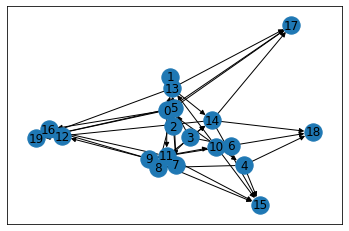

	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
Simulation for node number 15 is successful
Simulation for node number 16 is successful
Simulation for node number 17 is successful
Simulation for node number 18 is successful
Simulation for node number 19 is successful
	Sim

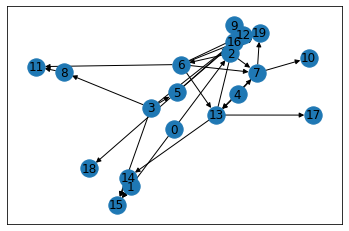

In [5]:
graph_size = 20
d = 3 # target edge degree
prob = d / (graph_size - 1) # probability to assign edge
length = 1000
simulations = 3 # desired number of simulations-datasets
successful = np.array([]) # number of successful simulations-datasets

while len(successful) < simulations:
    print("\tStarting simulation number " + str(len(successful)+1) +" :")
    
    # generate DAG
    DAG = generate_DAG(graph_size, prob)
    """
    function above generates a random (ER) DAG of size n and edge probability p 
    """
    
    # parametrize DAG with desired probabilities (defining range of probabilities)
    parametrize_DAG (DAG, lam = [0.005, 0.05], v_self = [0, 0.05], v_prop = [0.95, 1], lag = 3, step = 0.0001)
    """
    function above parametrizes DAG with SCM probabilities
    lam: probability that fault appears
    v_self: probability that fault persists on a node
    v_prop: probability that fault propagates to child node
    lag: time (samples) needed for a fault to propagate from parent to child
    step: probability resolution
    """
    
    # get undirected version in order so we can perform function nx.is_connected() below
    undirected = DAG.to_undirected(reciprocal=False, as_view=False)
    # check if we obtained a DAG                               
    if is_directed_acyclic_graph(DAG)==True and nx.is_connected(undirected)==True and len(DAG)==graph_size:
        
        # create dataset and extract ground truth list
        dataset = time_series(DAG, 1000)
        
        """
        function above builds Causal Model (SCM) and synthesizes time series of desired length
        by taking a graph (DAG) as input (structure + parameters) as depicted on Figure 2 in paper
        """
        
        
        dataset = dataset.astype('int32')
        durations = dataset.sum(axis=0)
        # if alert is almost always active (>98%) we run the simulation again
        durations_thresholded = [1 if i>=0.98*length else 0 for i in durations] 
        if sum(durations_thresholded) < 1:
            print("\tSimulation successful")        
            print("\tDataset number " + str(len(successful)+1) +" is created")
            print(" ")
            successful = np.append(successful, len(successful))
            # list of ground truth edges:
            # gt = get_ground_truth(DAG)
            # visualize DAG:
            plot_DAG(DAG)
            # save dataset
            dataset.to_csv('datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +'.csv', header=True, index = False)
            # save DAG parameters - ground truth
            nx.write_gexf(DAG, 'datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +"-groundtruth.gexf")
            
        else:
            print("\tError: There is at least one alert which is always active")                           
    else:
        # since graph generation process is random, sometimes the graph is not a DAG
        print("\tError: No DAG")

# <br><br><br>6. Synthesizing 3 datasets from a DAG of size 50:

For more datasets, just change number of `simulations`

	Starting simulation number 1 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
Simulation for node number 15 is successful
Simulation for node number 16 is successful
Simulation for node number 17 is successful
Simulation for node number 18 is successful
Simulation for node number 19 is successful
Simulation for node number 20 is successful
Simulation for node number 21 is successful
Simulation

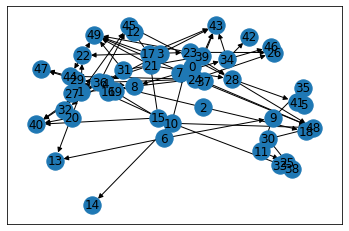

	Starting simulation number 2 :
	Error: No DAG
	Starting simulation number 2 :
	Error: No DAG
	Starting simulation number 2 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
Simulation for node number 15 is successful
Simulation for node number 16 is successful
Simulation for node number 17 is successful
Simulation for node number 18 is successful
Simulation for node number 19 is successful
Simu

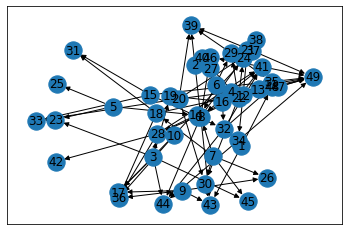

	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
	Error: No DAG
	Starting simulation number 3 :
Simulation for node number 0 is successful
Simulation for node number 1 is successful
Simulation for node number 2 is successful
Simulation for node number 3 is successful
Simulation for node number 4 is successful
Simulation for node number 5 is successful
Simulation for node number 6 is successful
Simulation for node number 7 is successful
Simulation for node number 8 is successful
Simulation for node number 9 is successful
Simulation for node number 10 is successful
Simulation for node number 11 is successful
Simulation for node number 12 is successful
Simulation for node number 13 is successful
Simulation for node number 14 is successful
Simulation for node number 15 is successful
Simulation for node number 16 is successful
Simulation for node number 17 is successful
Simulation for node number 18 is successful
Simulation for node number 19 is successful
Simu

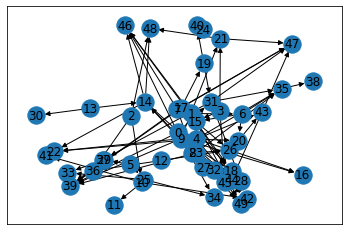

In [6]:
graph_size = 50
d = 3 # target edge degree
prob = d / (graph_size - 1) # probability to assign edge
length = 1000
simulations = 3 # desired number of simulations-datasets
successful = np.array([]) # number of successful simulations-datasets

while len(successful) < simulations:
    print("\tStarting simulation number " + str(len(successful)+1) +" :")
    
    # generate DAG
    DAG = generate_DAG(graph_size, prob)
    """
    function above generates a random (ER) DAG of size n and edge probability p 
    """
    
    # parametrize DAG with desired probabilities (defining range of probabilities)
    parametrize_DAG (DAG, lam = [0.005, 0.05], v_self = [0, 0.05], v_prop = [0.95, 1], lag = 3, step = 0.0001)
    """
    function above parametrizes DAG with SCM probabilities
    lam: probability that fault appears
    v_self: probability that fault persists on a node
    v_prop: probability that fault propagates to child node
    lag: time (samples) needed for a fault to propagate from parent to child
    step: probability resolution
    """
    
    # get undirected version in order so we can perform function nx.is_connected() below
    undirected = DAG.to_undirected(reciprocal=False, as_view=False)
    # check if we obtained a DAG                               
    if is_directed_acyclic_graph(DAG)==True and nx.is_connected(undirected)==True and len(DAG)==graph_size:
        
        # create dataset and extract ground truth list
        dataset = time_series(DAG, 1000)
        
        """
        function above builds Causal Model (SCM) and synthesizes time series of desired length
        by taking a graph (DAG) as input (structure + parameters) as depicted on Figure 2 in paper
        """
        
        
        dataset = dataset.astype('int32')
        durations = dataset.sum(axis=0)
        # if alert is almost always active (>98%) we run the simulation again
        durations_thresholded = [1 if i>=0.98*length else 0 for i in durations] 
        if sum(durations_thresholded) < 1:
            print("\tSimulation successful")        
            print("\tDataset number " + str(len(successful)+1) +" is created")
            print(" ")
            successful = np.append(successful, len(successful))
            # list of ground truth edges:
            # gt = get_ground_truth(DAG)
            # visualize DAG:
            plot_DAG(DAG)
            # save dataset
            dataset.to_csv('datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +'.csv', header=True, index = False)
            # save DAG parameters - ground truth
            nx.write_gexf(DAG, 'datasets\dataset-DAG-' +str(graph_size) +"-simulation-" +str(len(successful)) +"-groundtruth.gexf")
            
        else:
            print("\tError: There is at least one alert which is always active")                           
    else:
        # since graph generation process is random, sometimes the graph is not a DAG
        print("\tError: No DAG")